In [31]:
from sklearn.mixture import GaussianMixture as GMM
from shutil import copy
import pandas as pd
import numpy as np
import glob
import cv2
import os

In [3]:
link = "images/*.jpg"
dataset_paths = glob.glob(link)
images = {}

for image_path in dataset_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    images[image_path] = img.flatten();

print("The number of images : ", len(images))
print(images.get("images/1_1.jpg").shape)

The number of images :  100
(10000,)


In [4]:
df = pd.DataFrame([[sample] for _, sample in images.items()])
df.columns = ["images"]
df.index = images.keys()
df.head()

,images
images/36_4.jpg,"[95, 101, 105, 102, 105, 104, 99, 102, 105, 10..."
images/34_4.jpg,"[89, 100, 108, 103, 104, 104, 103, 105, 104, 1..."
images/20_2.jpg,"[25, 29, 32, 30, 31, 32, 33, 30, 31, 32, 31, 3..."
images/95_10.jpg,"[101, 113, 121, 113, 112, 112, 113, 116, 116, ..."
images/47_5.jpg,"[98, 111, 119, 109, 111, 113, 114, 114, 114, 1..."


In [8]:
data = np.array(list(df["images"]))
print(data.shape)

(100, 10000)


In [47]:
n_components = 4
gmm_model = GMM(n_components=n_components, covariance_type='tied')
gmm_model.fit(data)
gmm_labels = gmm_model.predict(data)

In [10]:
df["cluster"] = gmm_labels

df.head()

,images,cluster
images/36_4.jpg,"[95, 101, 105, 102, 105, 104, 99, 102, 105, 10...",1
images/34_4.jpg,"[89, 100, 108, 103, 104, 104, 103, 105, 104, 1...",1
images/20_2.jpg,"[25, 29, 32, 30, 31, 32, 33, 30, 31, 32, 31, 3...",2
images/95_10.jpg,"[101, 113, 121, 113, 112, 112, 113, 116, 116, ...",0
images/47_5.jpg,"[98, 111, 119, 109, 111, 113, 114, 114, 114, 1...",1


In [32]:
for index, row in df.iterrows():
    source = index
    distination = "{}/{}/".format("result", row.get("cluster"))
    
    if not os.path.exists(distination):
        os.makedirs(distination)
    
    copy(source, distination)

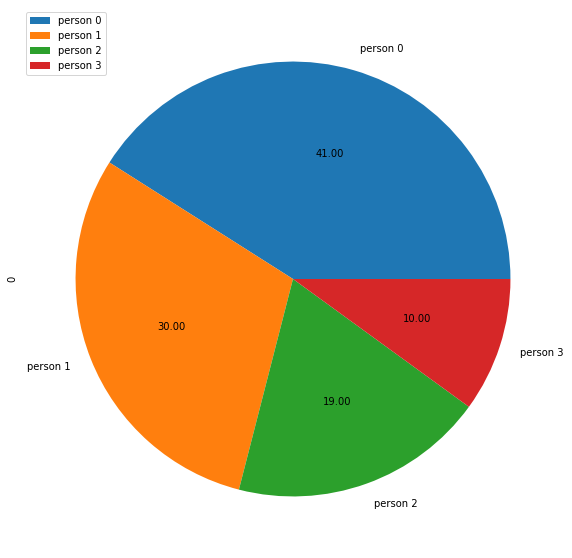

In [61]:
distributions = pd.DataFrame(list(df["cluster"].value_counts()), index=["person {}".format(i) for i in range(n_components)])
distributions.plot.pie(
    figsize=(16, 10),
    autopct="%.2f",
    subplots=True)
pass